In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
import os


In [36]:
median_incomes = pd.read_csv('Climate-Insurance-Redlining/data/yearly_median_income_by_zip.csv')
lowest_income = pd.read_csv('Climate-Insurance-Redlining/data/yearly_lowest_income_by_zip.csv')
percent_white = pd.read_csv('Climate-Insurance-Redlining/data/percent_white_population_yearly.csv')

renewals = pd.read_csv('Climate-Insurance-Redlining/data/renewals_totals.csv')




     ZIP  Year  Income
0  90001  2017   35660
1  90002  2017   34000
2  90003  2017   34397
3  90004  2017   46581
4  90005  2017   32461


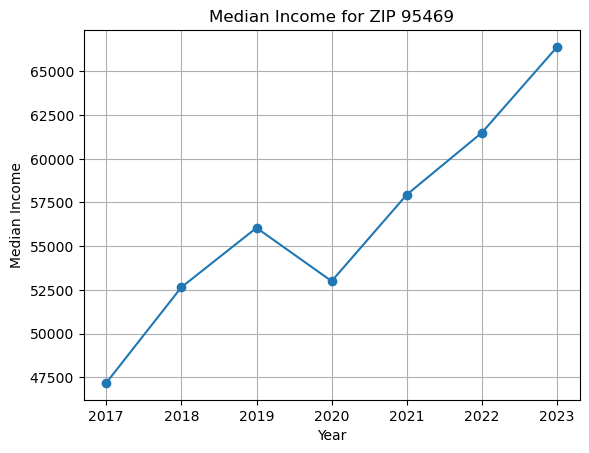

In [29]:
# Melt the dataframe to long format
median_incomes_long = median_incomes.melt(id_vars='ZIP', 
                  var_name='Year', 
                  value_name='Income')

# Clean the 'Year' column to extract the year only
median_incomes_long['Year'] = median_incomes_long['Year'].str.extract(r'(\d{4})').astype(int)

print(median_incomes_long.head())

zip_to_plot = 95469
median_incomes_zip = median_incomes_long[median_incomes_long['ZIP'] == zip_to_plot]

plt.plot(median_incomes_zip['Year'], median_incomes_zip['Income'], marker='o')
plt.title(f'Median Income for ZIP {zip_to_plot}')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.grid(True)
plt.show()

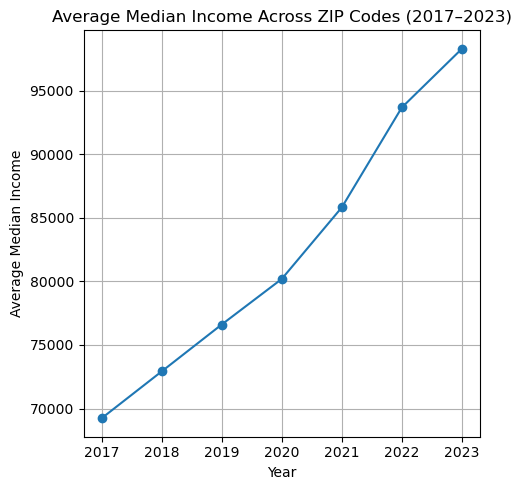

In [30]:
avg_income = median_incomes.drop(columns='ZIP').mean()

# Extract years from column names
years = [int(col[-4:]) for col in avg_income.index]

# Plot
plt.figure(figsize=(5, 5))
plt.plot(years, avg_income.values, marker='o', linestyle='-')
plt.title('Average Median Income Across ZIP Codes (2017–2023)')
plt.xlabel('Year')
plt.ylabel('Average Median Income')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
median_incomes.sample(2)

,ZIP,Median_Income_2017,Median_Income_2018,Median_Income_2019,Median_Income_2020,Median_Income_2021,Median_Income_2022,Median_Income_2023
142,90742,77153,81667,82614,81528,91250,112600,119115
1255,95618,85354,92531,93643,100876,105343,105625,112454


     ZIP  Year  Income
0  90001  2017      17
1  90002  2017      16
2  90003  2017      17
3  90004  2017      12
4  90005  2017      18


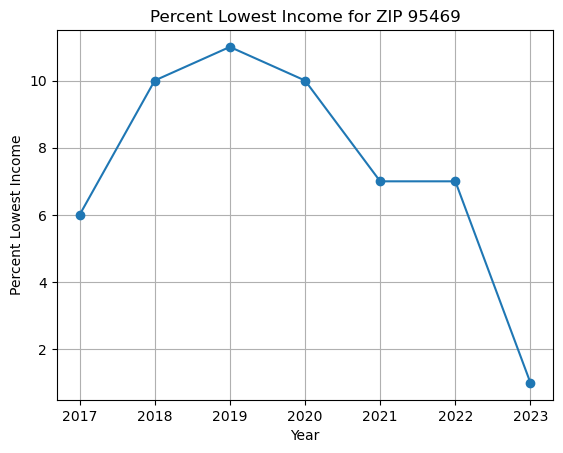

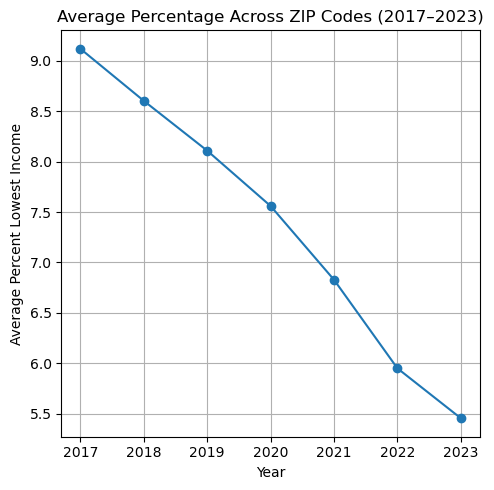

In [26]:
# Melt the dataframe to long format
lowest_income_long = lowest_income.melt(id_vars='ZIP', 
                  var_name='Year', 
                  value_name='Income')

# Clean the 'Year' column to extract the year only
lowest_income_long['Year'] = lowest_income_long['Year'].str.extract(r'(\d{4})').astype(int)

print(lowest_income_long.head())

zip_to_plot = 95469
lowest_income_zip = lowest_income_long[lowest_income_long['ZIP'] == zip_to_plot]

plt.plot(lowest_income_zip['Year'], lowest_income_zip['Income'], marker='o')
plt.title(f'Percent Lowest Income for ZIP {zip_to_plot}')
plt.xlabel('Year')
plt.ylabel('Percent Lowest Income')
plt.grid(True)
plt.show()

avg_income = lowest_income.drop(columns='ZIP').mean()

# Extract years from column names
years = [int(col[-4:]) for col in avg_income.index]

# Plot
plt.figure(figsize=(5, 5))
plt.plot(years, avg_income.values, marker='o', linestyle='-')
plt.title('Average Percentage Across ZIP Codes (2017–2023)')
plt.xlabel('Year')
plt.ylabel('Average Percent Lowest Income')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
lowest_income.sample(2)

,ZIP,lowest_Income_2017,lowest_Income_2018,lowest_Income_2019,lowest_Income_2020,lowest_Income_2021,lowest_Income_2022,lowest_Income_2023
1396,95650,7,6,4,5,4,6,5
798,93615,13,10,7,8,13,10,13


     zip  Year  Income
0  90001  2017    51.8
1  90002  2017    51.8
2  90003  2017    51.8
3  90004  2017    51.8
4  90005  2017    51.8


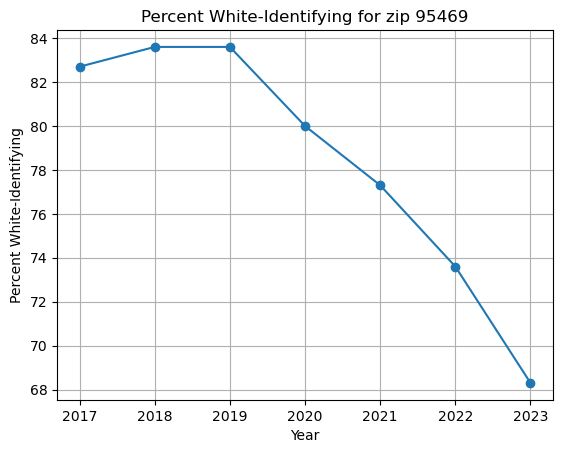

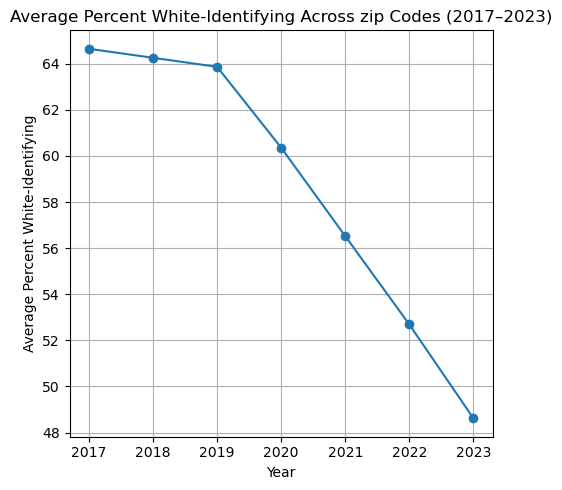

In [33]:
# Melt the dataframe to long format
percent_white_long = percent_white.melt(id_vars='zip', 
                  var_name='Year', 
                  value_name='Income')

# Clean the 'Year' column to extract the year only
percent_white_long['Year'] = percent_white_long['Year'].str.extract(r'(\d{4})').astype(int)

print(percent_white_long.head())

zip_to_plot = 95469
percent_white_zip = percent_white_long[percent_white_long['zip'] == zip_to_plot]

plt.plot(percent_white_zip['Year'], percent_white_zip['Income'], marker='o')
plt.title(f'Percent White-Identifying for zip {zip_to_plot}')
plt.xlabel('Year')
plt.ylabel('Percent White-Identifying')
plt.grid(True)
plt.show()

avg_income = percent_white.drop(columns='zip').mean()

# Extract years from column names
years = [int(col[-4:]) for col in avg_income.index]

# Plot
plt.figure(figsize=(5, 5))
plt.plot(years, avg_income.values, marker='o', linestyle='-')
plt.title('Average Percent White-Identifying Across zip Codes (2017–2023)')
plt.xlabel('Year')
plt.ylabel('Average Percent White-Identifying')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
percent_white.sample(2)

#renewals.sample(2)

,zip,2017,2018,2019,2020,2021,2022,2023
2289,95611,58.7,58.0,57.3,54.6,52.1,49.8,47.2
1177,93223,78.9,76.5,73.7,66.8,59.3,50.9,42.6


Pearson correlation: -0.2092


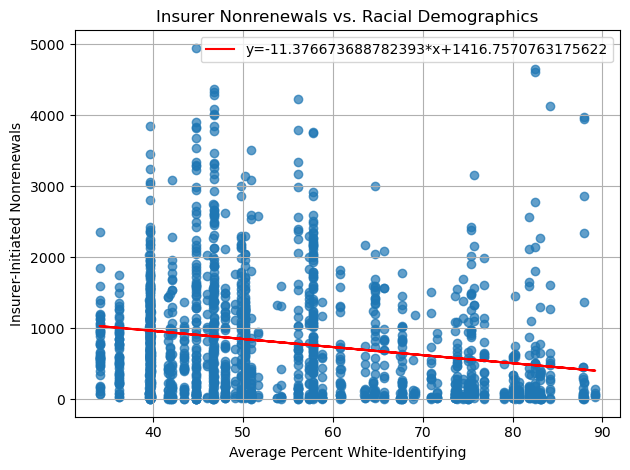

In [74]:
renewals_filtered = renewals[['ZIP Code', 'Insurer-Initiated Nonrenewed']]
percent_white_filtered =percent_white[['zip', '2022']]

renewals_filtered = renewals_filtered.rename(columns={'ZIP Code': 'ZIP'})
percent_white_filtered = percent_white_filtered.rename(columns={'zip': 'ZIP'})

combined = pd.merge(renewals_filtered, percent_white_filtered, on='ZIP', how='inner')

combined.sample(3)

correlation = combined['2022'].corr(combined['Insurer-Initiated Nonrenewed'])
print(f"Pearson correlation: {correlation:.4f}")

# Fit a linear regression line
x = combined['2022']
y = combined['Insurer-Initiated Nonrenewed']
m, b = np.polyfit(x, y, 1)

# Plot
plt.scatter(x, y, alpha=0.7)
plt.plot(x, m*x + b, color='red', label=f'y={m}*x+{b}')
plt.title('Insurer Nonrenewals vs. Racial Demographics')
plt.ylabel('Insurer-Initiated Nonrenewals')
plt.xlabel('Average Percent White-Identifying')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
from scipy.stats import pearsonr

r, p = pearsonr(combined['2022'], combined['Insurer-Initiated Nonrenewed'])
print(f"Pearson correlation: {r:.4f}")
print(f"P-value: {p:.4e}")


Pearson correlation: -0.2092
P-value: 2.8219e-18


In [58]:
lowest_income.sample(3)

,ZIP,lowest_Income_2017,lowest_Income_2018,lowest_Income_2019,lowest_Income_2020,lowest_Income_2021,lowest_Income_2022,lowest_Income_2023
146,90745,7,6,5,4,5,5,5
1382,95630,4,4,4,4,4,4,3
551,92630,4,4,4,3,2,2,2


Pearson correlation: -0.0977
P-value: 8.4224e-05


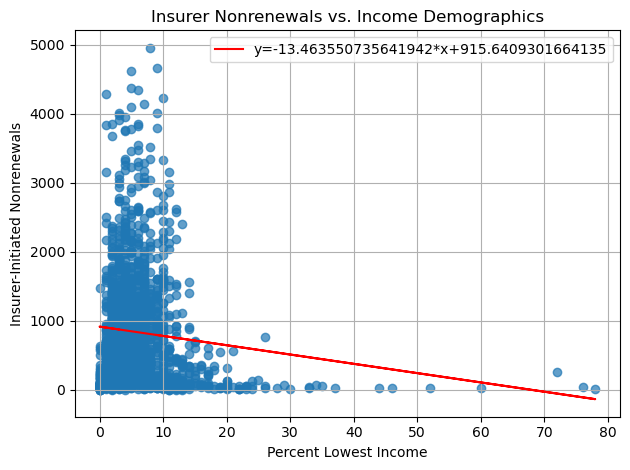

,ZIP,Median_Income_2017,Median_Income_2018,Median_Income_2019,Median_Income_2020,Median_Income_2021,Median_Income_2022,Median_Income_2023
587,92868,62856,65217,64949,69034,79722,87868,89050
42,90046,65990,67667,72266,72457,77162,87339,94259


In [78]:
lowest_income_filtered =lowest_income[['ZIP', 'lowest_Income_2022']]


combined = pd.merge(renewals_filtered, lowest_income_filtered, on='ZIP', how='inner')

combined.sample(3)

r, p = pearsonr(combined['lowest_Income_2022'], combined['Insurer-Initiated Nonrenewed'])
print(f"Pearson correlation: {r:.4f}")
print(f"P-value: {p:.4e}")

# Fit a linear regression line
x = combined['lowest_Income_2022']
y = combined['Insurer-Initiated Nonrenewed']
m, b = np.polyfit(x, y, 1)


# Plot
plt.scatter(x, y, alpha=0.7)
plt.plot(x, m*x + b, color='red', label=f'y={m}*x+{b}')
plt.title('Insurer Nonrenewals vs. Income Demographics')
plt.ylabel('Insurer-Initiated Nonrenewals')
plt.xlabel('Percent Lowest Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

median_incomes.sample(2)

Pearson correlation: 0.0386
P-value: 1.4115e-01


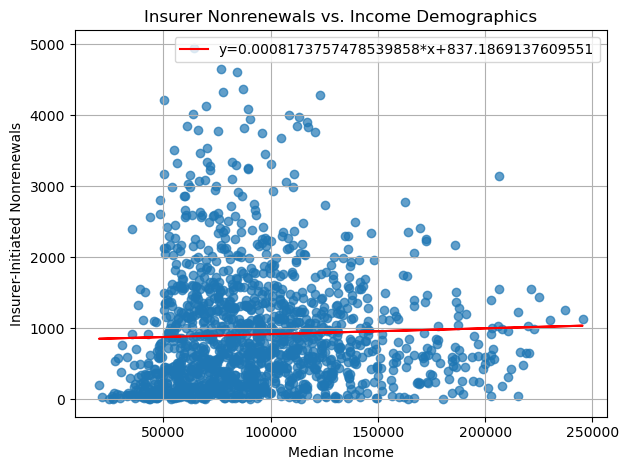

In [93]:
median_incomes_filtered =median_incomes[['ZIP', 'Median_Income_2022']]


combined = pd.merge(renewals_filtered, median_incomes_filtered, on='ZIP', how='inner')

combined.sample(3)

r, p = pearsonr(combined['Median_Income_2022'], combined['Insurer-Initiated Nonrenewed'])
print(f"Pearson correlation: {r:.4f}")
print(f"P-value: {p:.4e}")

# Fit a linear regression line
x = combined['Median_Income_2022']
y = combined['Insurer-Initiated Nonrenewed']
m, b = np.polyfit(x, y, 1)


# Plot
plt.scatter(x, y, alpha=0.7)
plt.plot(x, m*x + b, color='red', label=f'y={m}*x+{b}')
plt.title('Insurer Nonrenewals vs. Income Demographics')
plt.ylabel('Insurer-Initiated Nonrenewals')
plt.xlabel('Median Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [87]:
disasters= pd.read_csv('Climate-Insurance-Redlining/data/cleaned_climate_disasters.csv')

disasters.sample(2)

,ZIP,DATE,DISASTER
26246,93544,Oct,Fire
8278,93670,10,Drought


In [88]:
# Group by ZIP and DISASTER and count occurrences
disaster_by_zip = disasters.groupby(['ZIP', 'DISASTER']).size().reset_index(name='COUNT')

print(disaster_by_zip)

        ZIP    DISASTER  COUNT
0     90201  Earthquake      1
1     90201        Fire     18
2     90201       Flood      1
3     90201       Other      3
4     90201       Storm     18
...     ...         ...    ...
6791  96161       Storm      7
6792  96162     Drought      1
6793  96162        Fire      2
6794  96162       Flood      1
6795  96162       Storm      7

[6796 rows x 3 columns]


In [89]:
total_disasters_by_zip = disasters['ZIP'].value_counts().reset_index()
total_disasters_by_zip.columns = ['ZIP', 'TOTAL_OCCURRENCES']

print(total_disasters_by_zip)

        ZIP  TOTAL_OCCURRENCES
0     90307                 41
1     90201                 41
2     90220                 41
3     90221                 41
4     90222                 41
...     ...                ...
1477  95970                  6
1478  95955                  6
1479  95043                  5
1480  95023                  5
1481  95024                  5

[1482 rows x 2 columns]


Pearson correlation: -0.3169
P-value: 6.3731e-36


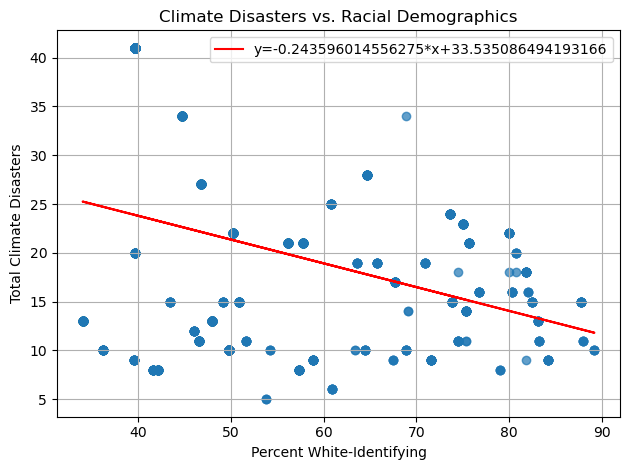

In [95]:
total_disasters_by_zip_filtered =total_disasters_by_zip[['ZIP', 'TOTAL_OCCURRENCES']]


combined = pd.merge(percent_white_filtered, total_disasters_by_zip_filtered, on='ZIP', how='inner')

combined.sample(3)

r, p = pearsonr(combined['TOTAL_OCCURRENCES'], combined['2022'])
print(f"Pearson correlation: {r:.4f}")
print(f"P-value: {p:.4e}")

# Fit a linear regression line
y = combined['TOTAL_OCCURRENCES']
x = combined['2022']
m, b = np.polyfit(x, y, 1)


# Plot
plt.scatter(x, y, alpha=0.7)
plt.plot(x, m*x + b, color='red', label=f'y={m}*x+{b}')
plt.title('Climate Disasters vs. Racial Demographics')
plt.ylabel('Total Climate Disasters')
plt.xlabel('Percent White-Identifying')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Pearson correlation: -0.0052
P-value: 8.8043e-01


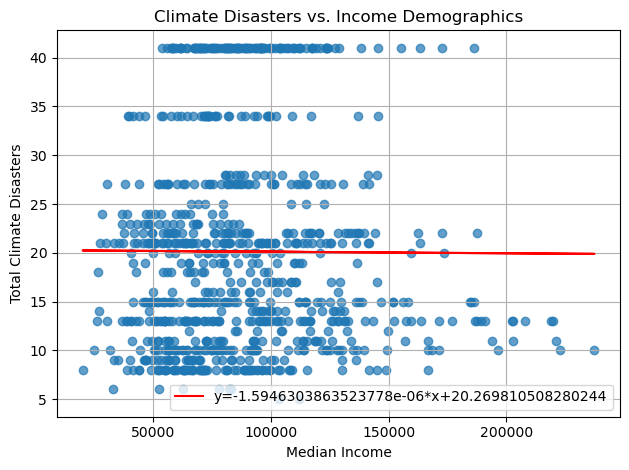

In [ ]:
combined = pd.merge(median_incomes_filtered, total_disasters_by_zip_filtered, on='ZIP', how='inner')



r, p = pearsonr(combined['TOTAL_OCCURRENCES'], combined['Median_Income_2022'])
print(f"Pearson correlation: {r:.4f}")
print(f"P-value: {p:.4e}")

# Fit a linear regression line
y = combined['TOTAL_OCCURRENCES']
x = combined['Median_Income_2022']
m, b = np.polyfit(x, y, 1)


# Plot
plt.scatter(x, y, alpha=0.7)
plt.plot(x, m*x + b, color='red', label=f'y={m}*x+{b}')
plt.title('Climate Disasters vs. Income Demographics')
plt.ylabel('Total Climate Disasters')
plt.xlabel('Median Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

,ZIP,Median_Income_2022,TOTAL_OCCURRENCES
737,95823,59547,10
354,93550,61394,41
535,95017,78542,19
